In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import linregress
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from sklearn.linear_model import LinearRegression

%matplotlib inline

# Least squares curve fitting

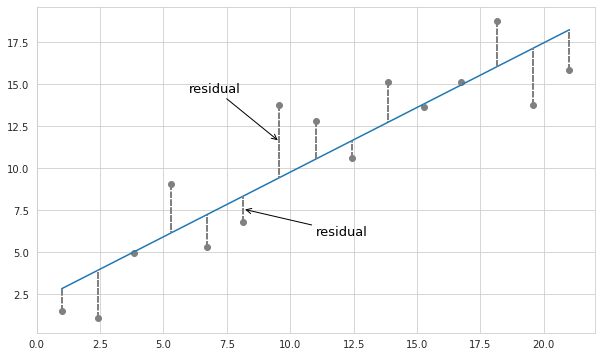

In [4]:
np.random.seed(42)
x = np.linspace(1, 21, 15)
y = np.linspace(0, 21, 15) + np.random.normal(0, 3, 15)

slope, intercept, r_value, p_value, std_err = linregress(x,y) # parameters from least squares computed linear regression

with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x, y, color='grey') # actual data
y_computed = np.array([intercept+i*slope for i in x])
residuals = y_computed - y
ax.plot(x, y_computed) # fitted line
for r in list(zip(x, y, y_computed)):
    ax.plot([x, x], [y, y_computed], linestyle='--', color='gray')
ax.annotate('residual', xy=(x[6],(y[6]+y_computed[6])/2), xytext=(6, 14.5), 
            arrowprops=dict(arrowstyle="->"), fontsize=13)
ax.annotate('residual', xy=(x[5],(y[5]+y_computed[5])/2), xytext=(11, 6), 
            arrowprops=dict(arrowstyle="->"), fontsize=13)
plt.savefig('../../assets/images/regression/residuals_demo.png', bbox_inches='tight');

# Heteroscedasticity

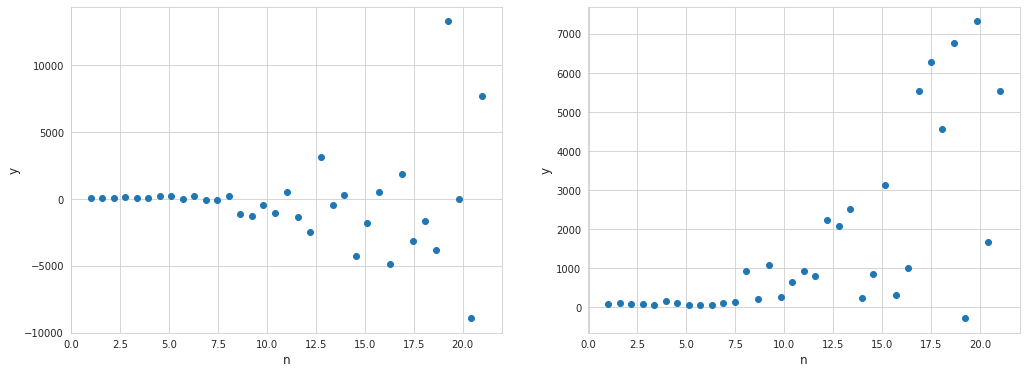

In [80]:
x = np.linspace(1, 21, 35)
np.random.seed(42)
y1 = np.random.normal(100, x**3, 35)
y2 = abs(np.random.normal(100, x**3, 35)) + np.random.normal(0, x**2.5, 35)

with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(1, 2, figsize=(17,6))
ax[0].scatter(x, y1)
ax[1].scatter(x, y2)
for ax in ax:
    ax.set_xlabel('n', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
#plt.savefig('../../assets/images/regression/heteroscedasticity_demo.png', bbox_inches='tight');

# Correlation

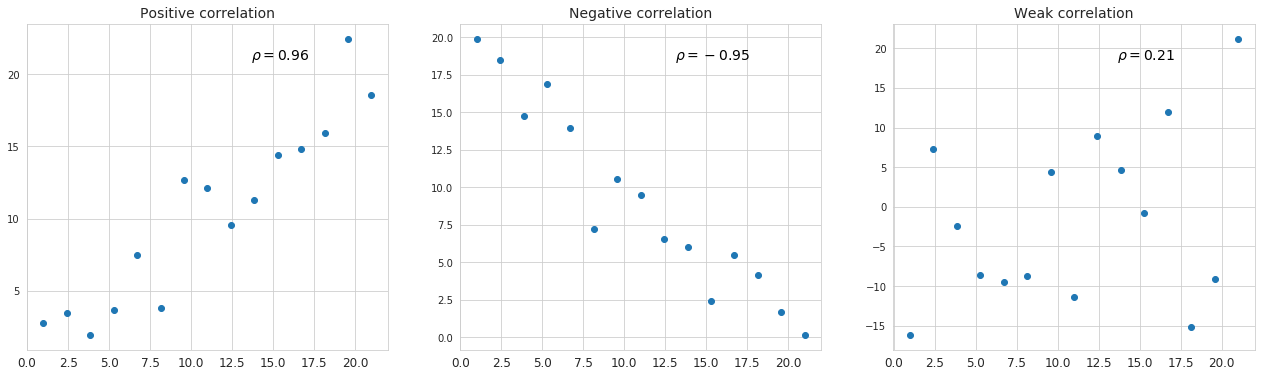

In [3]:
x = np.linspace(1, 21, 15)
def get_data(relation=1):
    if relation == 1: # positive correlation coefficient
        y = np.linspace(0, 21, 15) + np.random.normal(0, 2, 15)
    elif relation == -1:  # negative correlation coefficient
        y = np.linspace(21, 0, 15) + np.random.normal(0, 2, 15)
    elif relation == 0:  # neutral correlation coefficient
        y = np.random.normal(0, 11, 15)
    else: 
        return
    corr, _ = pearsonr(x, y)
    return [y, round(corr, 2)]

with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(1, 3, figsize=(22,6))
    
ax[0].scatter(x, get_data(relation=1)[0])
ax[0].annotate(f'$\\rho={get_data(relation=1)[1]}$', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=14,
        ha='center', va='center')
ax[0].set_title('Positive correlation', fontsize=14)

ax[1].scatter(x, get_data(relation=-1)[0])
ax[1].annotate(f'$\\rho={get_data(relation=-1)[1]}$', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=14,
        ha='center', va='center')
ax[1].set_title('Negative correlation', fontsize=14)

ax[2].scatter(x, get_data(relation=0)[0])
ax[2].annotate(f'$\\rho={get_data(relation=0)[1]}$', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=14,
        ha='center', va='center')
ax[2].set_title('Weak correlation', fontsize=14)

for ax in ax:
    ax.xaxis.set_tick_params(labelsize=12)
#plt.savefig('../../assets/images/regression/correlation_demo.png', bbox_inches='tight');

# Boston hoses prices example

In [237]:
from sklearn.datasets import load_boston
data = load_boston()

In [126]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [299]:
df = pd.DataFrame(data['data'], columns=data.feature_names)
df['price'] = data['target']

## Validation of linear relationship

In [252]:
df.corr()['price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
price      1.000000
Name: price, dtype: float64

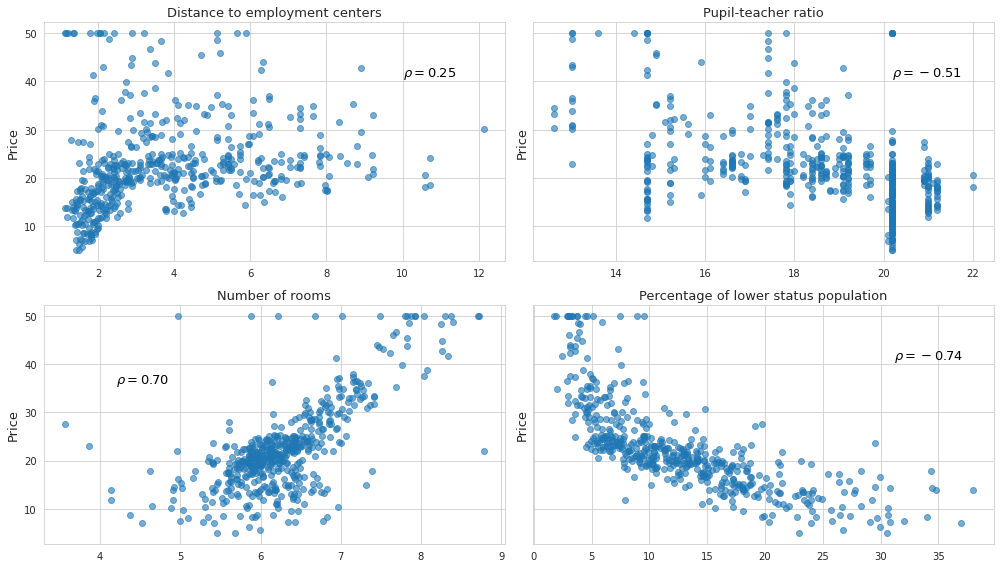

In [82]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(2, 2, figsize=(14, 8), sharey=True)
ax[0][0].scatter(df['DIS'], df['price'], alpha=0.6)
ax[0][0].set_title('Distance to employment centers', fontsize=13)
ax[0][0].text(10, 41, r'$\rho=0.25$', fontsize=13)
ax[0][1].scatter(df['PTRATIO'], df['price'], alpha=0.6)
ax[0][1].set_title('Pupil-teacher ratio', fontsize=13)
ax[0][1].text(20.2, 41, r'$\rho=-0.51$', fontsize=13)
ax[1][0].scatter(df['RM'], df['price'], alpha=0.6)
ax[1][0].set_title('Number of rooms', fontsize=13)
ax[1][0].text(4.2, 36, r'$\rho=0.70$', fontsize=13)
ax[1][1].scatter(df['LSTAT'], df['price'], alpha=0.6)
ax[1][1].set_title('Percentage of lower status population', fontsize=13)
ax[1][1].text(31.2, 41, r'$\rho=-0.74$', fontsize=13)
for r in ax:
    for c in r:
        c.set_ylabel('Price', fontsize=13)
plt.tight_layout()
plt.savefig('../../assets/images/regression/correlation_example2.png', bbox_inches='tight');

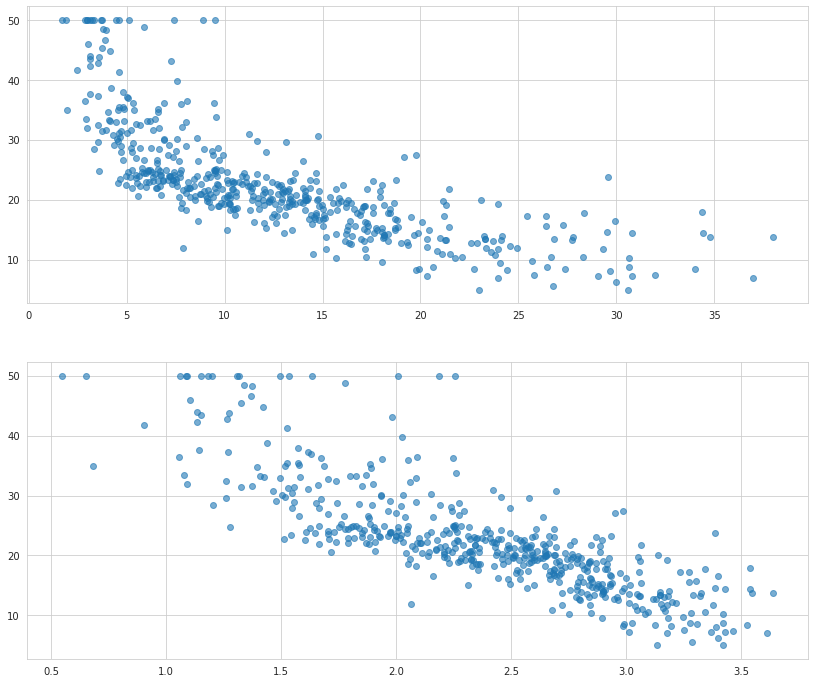

In [248]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(2, 1, figsize=(14, 12))
ax[0].scatter(df['LSTAT'], df['price'], alpha=0.6)
ax[1].scatter(np.log(df['LSTAT']), df['price'], alpha=0.6)

* CRIM - log transform and keep
* ZN - too many zeroes, keep for now
* INDUS - too many similar values, log transform and keep for now
* CHAS - binary variable, leave out
* NOX - seems ok, keep
* RM - keep
* AGE - weak correlation, keep for now
* DIS - log transform and keep
* RAD - only a set of discrete values, leave out
* TAX - too many similar values, log transform and keep for now
* PTRATIO - too many similar values, keep for now
* B - doesn't seem to be related, leave out
* LSTAT - log transform and keep

In [301]:
df[['CRIM', 'INDUS', 'DIS', 'TAX', 'LSTAT']] = np.log(df[['CRIM', 'INDUS', 'DIS', 'TAX', 'LSTAT']])
df = df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT', 'price']]

### Absence of multicollinearity

In [254]:
df.corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,price
CRIM,1.000000,-0.517091,0.739553,0.788616,-0.306943,0.658284,-0.743926,0.809977,0.389554,0.591796,-0.454302
ZN,-0.517091,1.000000,-0.655898,-0.516604,0.311991,-0.569537,0.590655,-0.305892,-0.391679,-0.477706,0.360445
INDUS,0.739553,-0.655898,1.000000,0.724931,-0.431267,0.625381,-0.730297,0.659285,0.430022,0.617578,-0.519270
NOX,0.788616,-0.516604,0.724931,1.000000,-0.302188,0.731470,-0.831977,0.660287,0.188933,0.577072,-0.427321
RM,-0.306943,0.311991,-0.431267,-0.302188,1.000000,-0.240265,0.256584,-0.299214,-0.355501,-0.664528,0.695360
AGE,0.658284,-0.569537,0.625381,0.731470,-0.240265,1.000000,-0.778243,0.495534,0.261515,0.606806,-0.376955
DIS,-0.743926,0.590655,-0.730297,-0.831977,0.256584,-0.778243,1.000000,-0.599621,-0.238127,-0.524343,0.292316
TAX,0.809977,-0.305892,0.659285,0.660287,-0.299214,0.495534,-0.599621,1.000000,0.430350,0.514301,-0.474701
PTRATIO,0.389554,-0.391679,0.430022,0.188933,-0.355501,0.261515,-0.238127,0.430350,1.000000,0.417022,-0.507787
LSTAT,0.591796,-0.477706,0.617578,0.577072,-0.664528,0.606806,-0.524343,0.514301,0.417022,1.000000,-0.815442


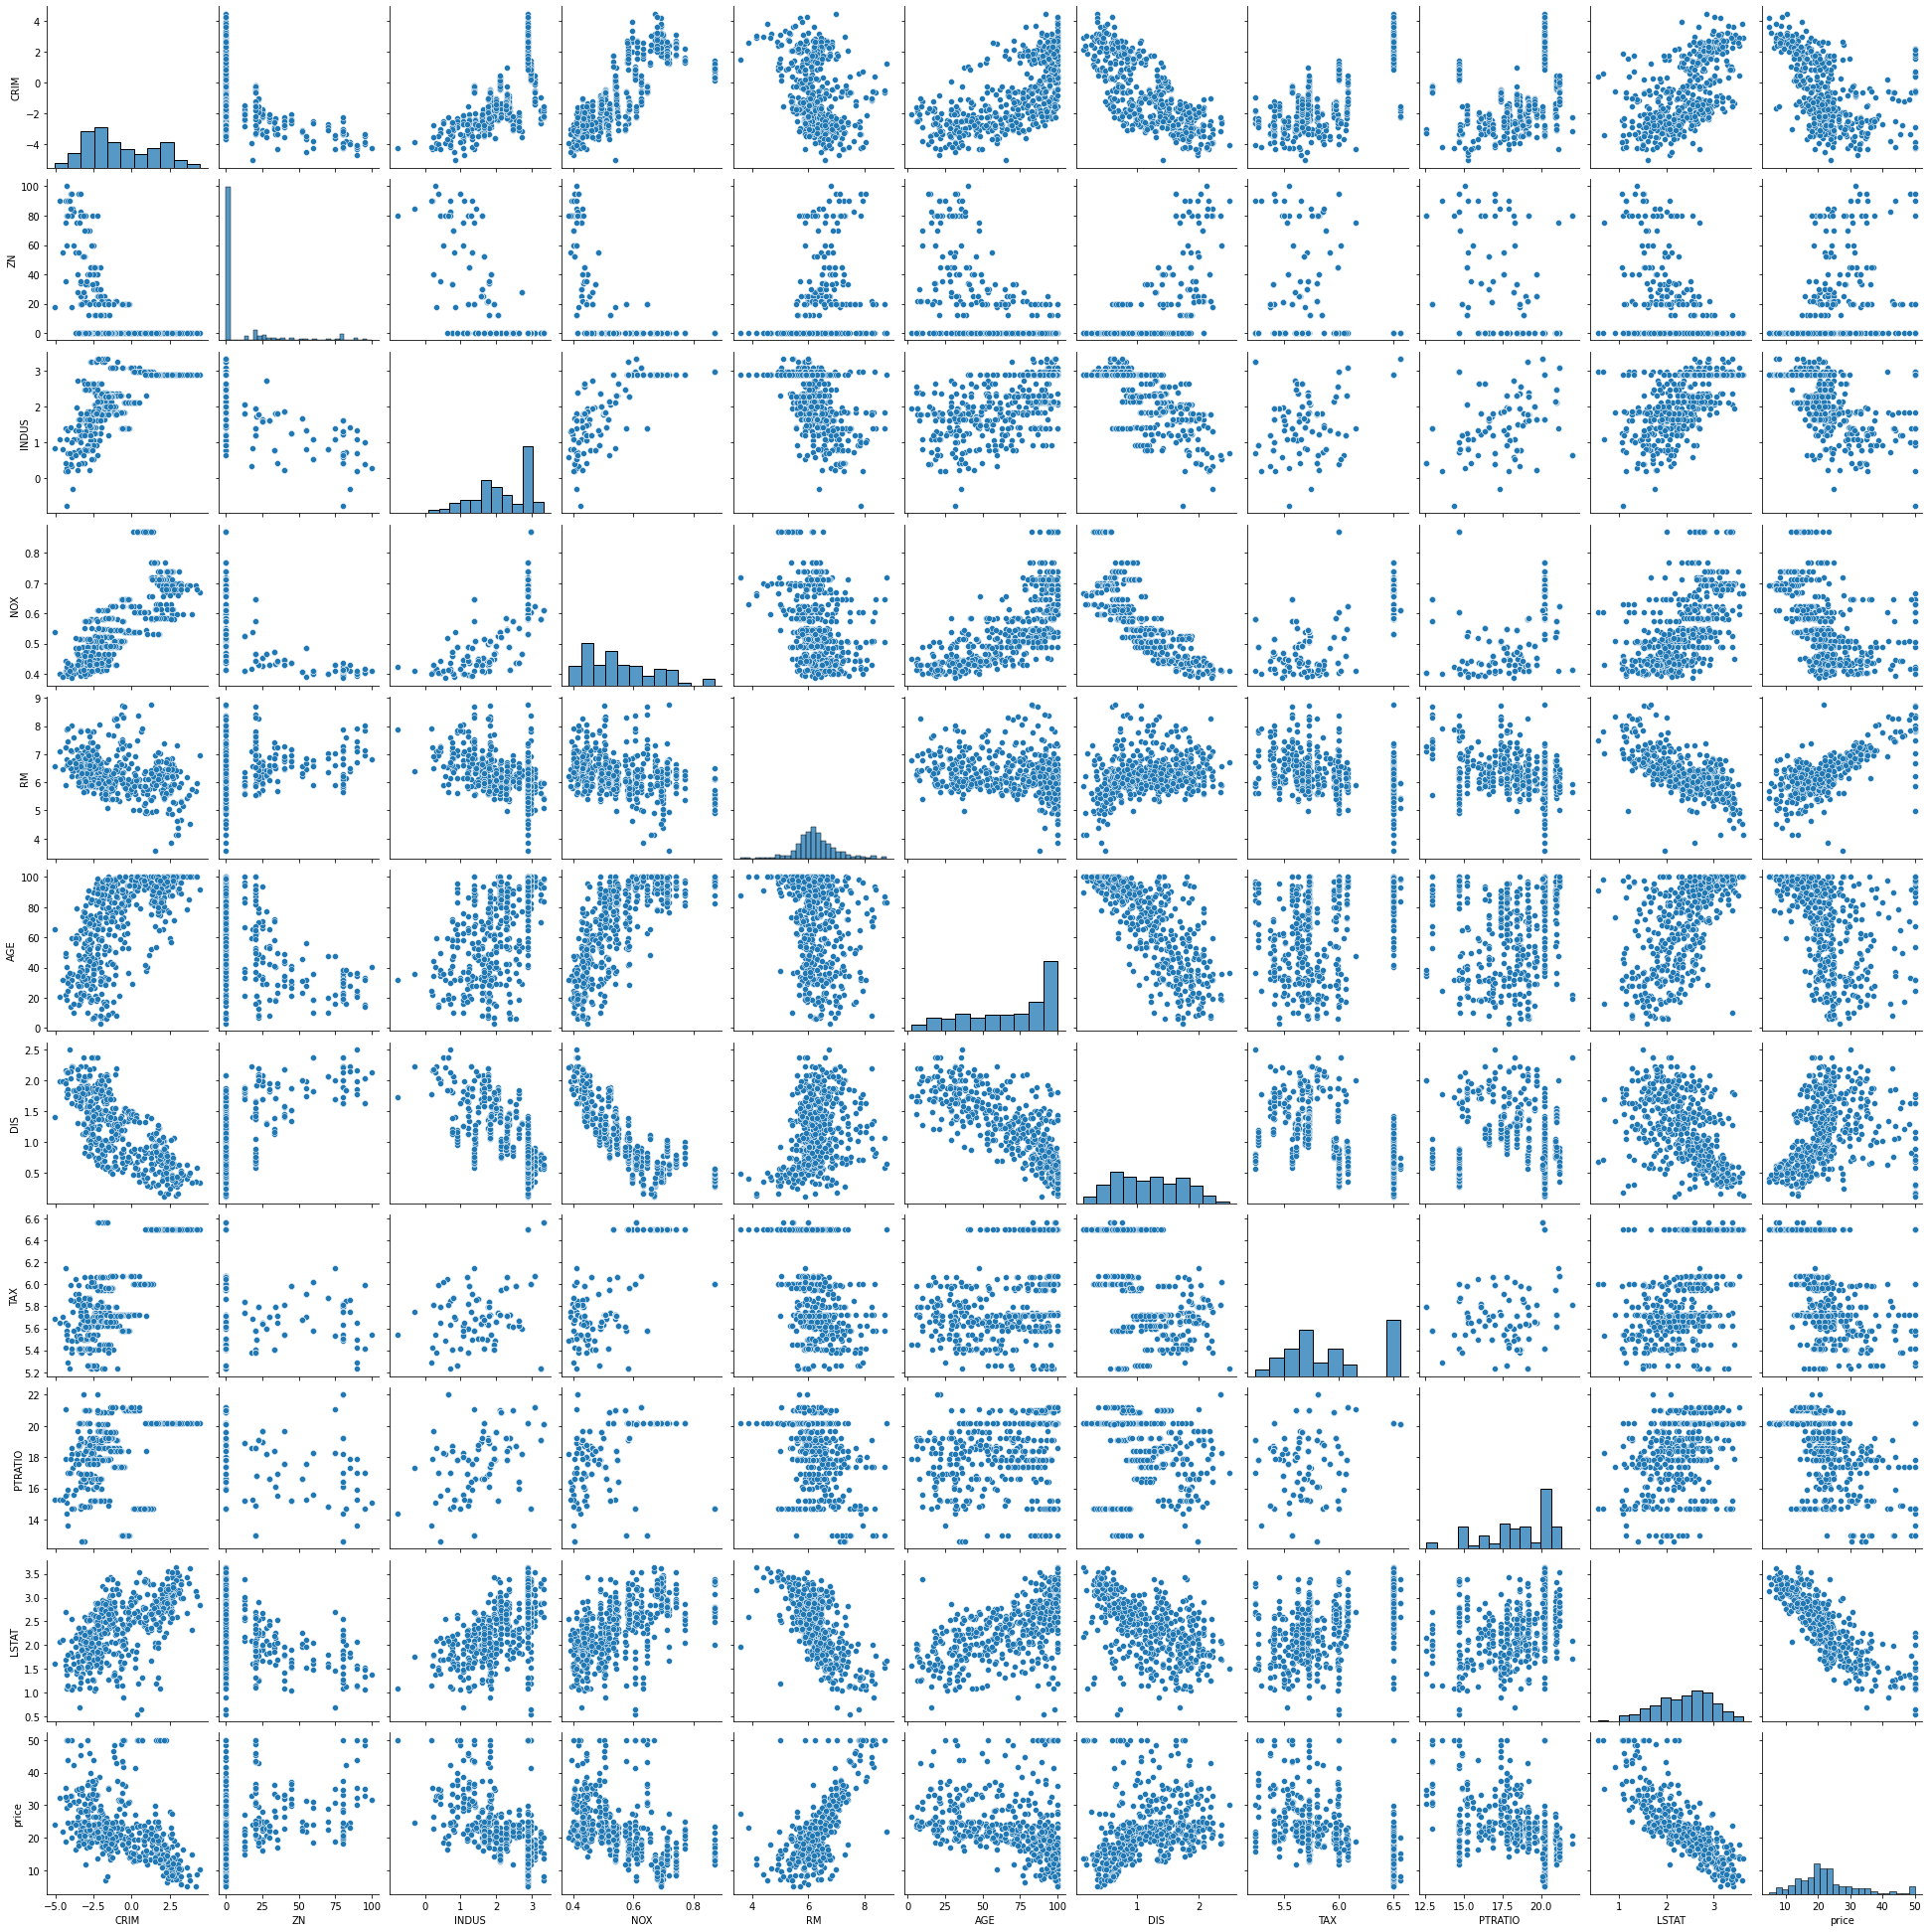

In [255]:
sns.pairplot(df)

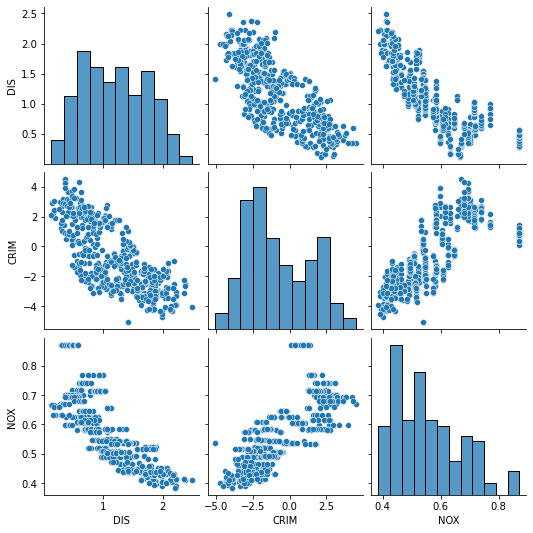

In [312]:
sns.pairplot(df[['DIS', 'CRIM', 'NOX']])
plt.savefig('../../assets/images/regression/correlation_example3.png', bbox_inches='tight');

CRIM, NOX, DIS are related<br>
So are RM and LSTAT

In [274]:
X = sm.add_constant(df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']])
[{X.columns[i]: variance_inflation_factor(X.values, i)} for i in range(len(X.columns))] 

[{'const': 1221.844426122971},
 {'CRIM': 5.083007771069395},
 {'ZN': 2.309075030174274},
 {'INDUS': 3.736252655548904},
 {'NOX': 4.821846376489694},
 {'RM': 2.043892854561917},
 {'AGE': 3.3272163754750808},
 {'DIS': 4.692080167654636},
 {'TAX': 3.689517937469483},
 {'PTRATIO': 1.6522329723404623},
 {'LSTAT': 3.2148117242774816}]

In [281]:
y = df['price']
X = sm.add_constant(df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']])
lin_regr_sm = sm.OLS(y, X).fit()
print(lin_regr_sm.summary())
print('Total loss:')
print(np.sum([e**2 for e in lin_regr_sm.resid]))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     173.7
Date:                Sat, 24 Jul 2021   Prob (F-statistic):          8.00e-155
Time:                        08:06:16   Log-Likelihood:                -1459.2
No. Observations:                 506   AIC:                             2940.
Df Residuals:                     495   BIC:                             2987.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.7566      6.798     11.437      0.0

/home/vzahorui/miniconda3/envs/base_env/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


* ZN is insignificant, leave out
* INDUS is insignificant, leave out
* AGE is insignificant, leave out

In [283]:
X = sm.add_constant(df[['CRIM', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']])
[{X.columns[i]: variance_inflation_factor(X.values, i)} for i in range(len(X.columns))] 

/home/vzahorui/miniconda3/envs/base_env/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


[{'const': 1183.2534650341563},
 {'CRIM': 4.867832208094139},
 {'NOX': 4.591974758168373},
 {'RM': 1.8767362788793738},
 {'DIS': 3.516427105596321},
 {'TAX': 3.098171105280077},
 {'PTRATIO': 1.4680496540517765},
 {'LSTAT': 2.7445864376015234}]

In [284]:
lin_regr_sm = sm.OLS(y, X).fit()
print(lin_regr_sm.summary())
print('Total loss:')
print(np.sum([e**2 for e in lin_regr_sm.resid]))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     247.0
Date:                Sat, 24 Jul 2021   Prob (F-statistic):          1.66e-157
Time:                        08:16:10   Log-Likelihood:                -1461.3
No. Observations:                 506   AIC:                             2939.
Df Residuals:                     498   BIC:                             2972.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.5467      6.697     11.579      0.0

* remove NOX which is unstable and highly correlated with CRIM and DIS
* remove CRIM which becomes unstable after removal of NOX

In [350]:
X = sm.add_constant(df[['LSTAT', 'RM', 'DIS', 'TAX']])
lin_regr_sm = sm.OLS(y, X).fit()
print(lin_regr_sm.summary())
print('Total loss:')
print(np.sum([e**2 for e in lin_regr_sm.resid]))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     371.0
Date:                Sat, 24 Jul 2021   Prob (F-statistic):          3.20e-148
Time:                        22:00:20   Log-Likelihood:                -1491.9
No. Observations:                 506   AIC:                             2994.
Df Residuals:                     501   BIC:                             3015.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.0188      5.412     10.906      0.0

/home/vzahorui/miniconda3/envs/base_env/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [356]:
[{X.columns[i]: variance_inflation_factor(X.values, i)} for i in range(len(X.columns))] 

[{'const': 688.5489000585527},
 {'LSTAT': 2.4871769971599393},
 {'RM': 1.8289391523256207},
 {'DIS': 1.7620518497585647},
 {'TAX': 1.708396906752592}]

## Inspect the residual plot in order to spot patterns (violation of independence)

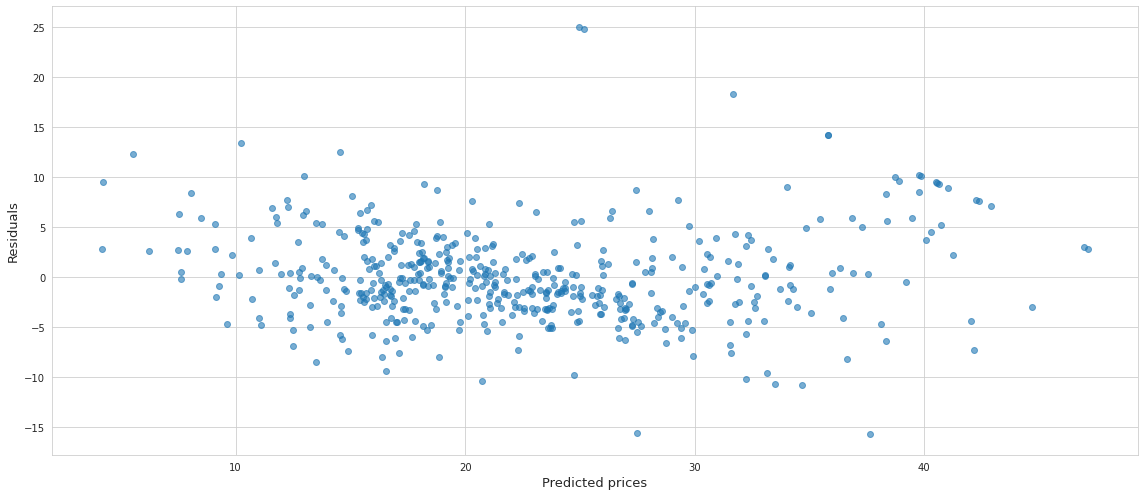

In [359]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(16, 7))
ax.scatter(lin_regr_sm.predict(X), lin_regr_sm.resid, alpha=0.6)
ax.set_xlabel('Predicted prices', fontsize=13)
ax.set_ylabel('Residuals', fontsize=13)
plt.tight_layout()
plt.savefig('../../assets/images/regression/predicted_value_vs_residuals.png', bbox_inches='tight');

## QQ plot to check the normality of distribution of the residuals

/home/vzahorui/miniconda3/envs/base_env/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


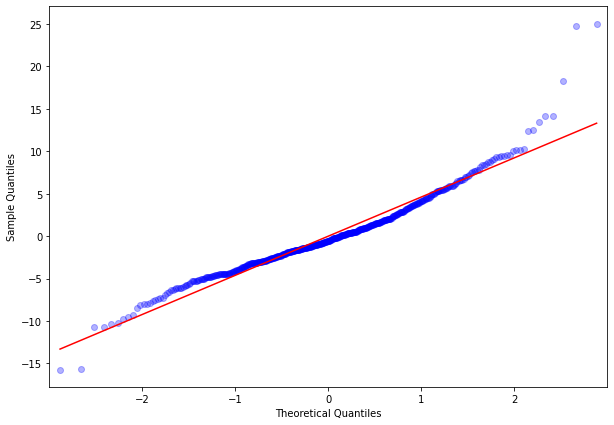

In [357]:
fig, ax = plt.subplots(figsize=(10,7))
sm.qqplot(lin_regr_sm.resid, line='s', alpha=0.3, ax=ax);
plt.savefig('../../assets/images/regression/qq_plot_residuals.png', bbox_inches='tight');

## Test Heteroscedasticity

In [360]:
het_white(resid=lin_regr_sm.resid, exog=X)

(155.3399162649951,
 6.123155110271697e-26,
 15.536392735526004,
 2.3309841293011686e-31)

In [361]:
het_breuschpagan(resid=lin_regr_sm.resid, exog_het=X)

(57.13687098722252,
 1.1580157188774278e-11,
 15.943374780836379,
 2.7008331840255184e-12)

## Some extra

### Breusch-Godfrey test for autocorrelation of higher order

In [144]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
chi, chi_p, _, _ = acorr_breusch_godfrey(lin_regr_sm, nlags=1)
print("{0:.12f}".format(chi_p)) 

0.000000370336


### Prais–Winsten estimation

In [145]:
# rellies of statsmodels libary
def prais_winsten(model):
    x = model.model.exog 
    y = model.model.endog
    e = model.resid
    e0, e1 = e[:-1], e[1:]
    # AR1 process: e1 = rho*e0 + u 
    # => e1*e0 = rho*e0*e0 
    # => rho = e1*e0/e0*e0
    rho0 = np.dot(e1, e0)/np.dot(e0, e0)
    rdiff = 1.0
    while(rdiff > 1.0e-5):
        model1 = prais_winsten_aux(model, rho0)
        e = y - (x @ model1.params)
        e0, e1 = e[:-1], e[1:]
        rho1 = np.dot(e1, e0)/np.dot(e0, e0)
        rdiff = np.abs(rho1 - rho0)
        rho0 = rho1
        print('Rho = ', rho0)
    model1 = prais_winsten_aux(model, rho0)
    return(model1)

def prais_winsten_aux(model, rho):
    x = model.model.exog
    y = model.model.endog
    ystar = y[1:] - rho*y[:-1]
    xstar = x[1:] - rho*x[:-1]
    # Prais-Winston adjustment to Cochrane-Orcutt estimation
    ystar = np.append(np.sqrt(1-rho**2)*y[0], ystar)
    xstar = np.append([np.sqrt(1-rho**2)*x[0]], xstar, axis=0)
    # find parameters for the adjusted differences
    model_ar1 = sm.OLS(ystar, xstar).fit()
    return(model_ar1)

# lin_regr_sm is the previously fit model
prais_winsten_results = prais_winsten(lin_regr_sm)
# ar1_co = OLSAR1(model_ols,drop1=True)
print(prais_winsten_results.summary())
# total loss
print('Total loss:')
print(np.sum([e**2 for e in prais_winsten_results.resid]))

Rho =  0.23287777685821356
Rho =  0.23301992216725592
Rho =  0.23302325589268538
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.920
Model:                            OLS   Adj. R-squared (uncentered):              0.920
Method:                 Least Squares   F-statistic:                              1934.
Date:                Wed, 14 Jul 2021   Prob (F-statistic):                   1.13e-275
Time:                        07:33:12   Log-Likelihood:                         -1569.1
No. Observations:                 506   AIC:                                      3144.
Df Residuals:                     503   BIC:                                      3157.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err       

In [146]:
new_X = prais_winsten_results.model.exog
new_y = prais_winsten_results.model.endog
predicted_new_y = prais_winsten_results.predict(new_X)

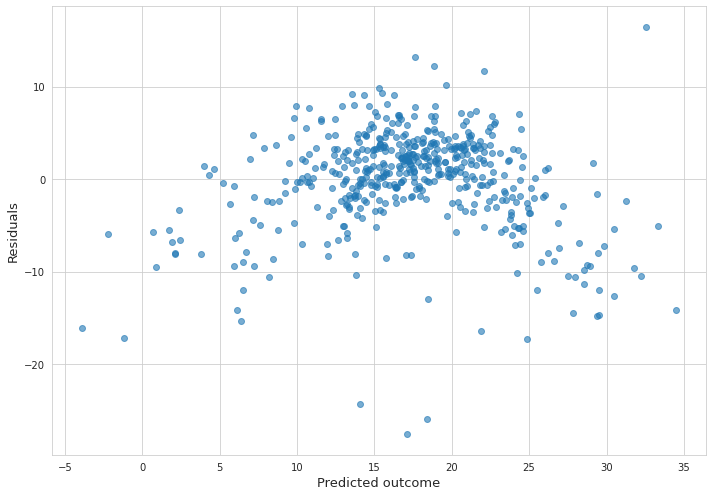

In [159]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(predicted_new_y, -prais_winsten_results.resid, alpha=0.6)
ax.set_xlabel('Predicted outcome', fontsize=13)
ax.set_ylabel('Residuals', fontsize=13)
plt.tight_layout()
plt.savefig('../../assets/images/regression/independence_of_errors2.png', bbox_inches='tight');